In [1]:
%matplotlib inline

In [2]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent.parent))

In [3]:
import numpy as np
import pandas as pd
from cv2 import BORDER_CONSTANT, copyMakeBorder
from skimage.util import montage
from skimage.util.shape import view_as_windows
import torch
import SimpleITK as sitk

import matplotlib.pyplot as plt
from dataset.patch_dataset import BrainPatchesDataset
from dataset.roi_extraction import reconstruct_patches, extract_ROIs

/home/user0/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# img = sitk.ReadImage('/home/vzalevskyi/uni/MAIA_Semester_3/misa/final_project/data/Training_Set/IBSR_01/IBSR_01.nii.gz')
# img_array = sitk.GetArrayFromImage(img).T
# img_array.shape

In [9]:
patches_dataset = BrainPatchesDataset('train', denoiser='synthseg')
len(patches_dataset)

15395

/home/user0/misa_vlex/brain_segmentation/dataset/patch_dataset.py:231: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ssegmask = torch.tensor(ssegmask, dtype=torch.float) if ssegmask is not None else None


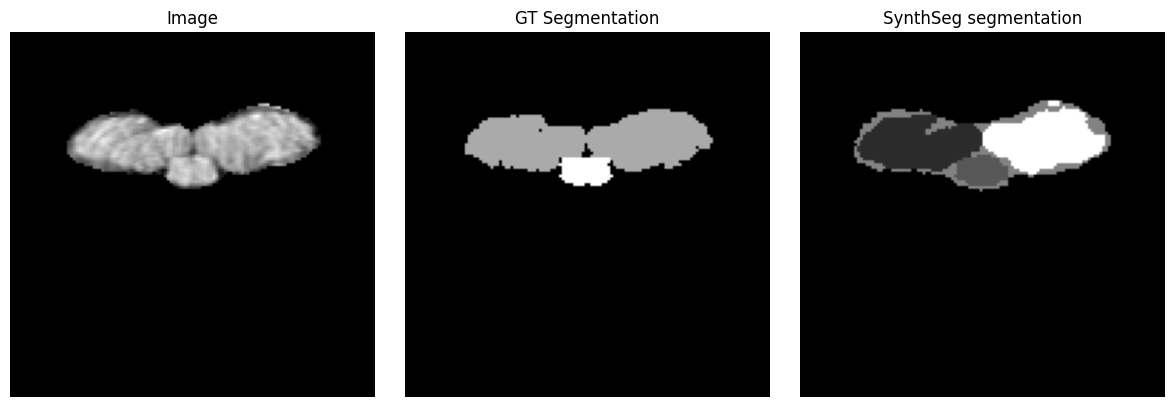

In [10]:
for p in patches_dataset:
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].imshow(p['img'][0, :, :], cmap='gray')
    ax[1].imshow(p['mask'][:, :], cmap='gray')
    ax[2].imshow(p['img'][1, :, :], cmap='gray')
    ax[0].set_axis_off()
    ax[1].set_axis_off()
    ax[2].set_axis_off()
    ax[0].set_title('Image')
    ax[1].set_title('GT Segmentation')
    ax[2].set_title('SynthSeg segmentation')
    # plt.imshow(p['img'][0, :, :], cmap='gray')
    plt.tight_layout()
    plt.show()
    break

In [11]:
patches_dataset[0]

{'img': tensor([[[-3.6046, -3.6046, -3.6046,  ..., -3.6046, -3.6046, -3.6046],
          [-3.6046, -3.6046, -3.6046,  ..., -3.6046, -3.6046, -3.6046],
          [-3.6046, -3.6046, -3.6046,  ..., -3.6046, -3.6046, -3.6046],
          ...,
          [-3.6046, -3.6046, -3.6046,  ..., -3.6046, -3.6046, -3.6046],
          [-3.6046, -3.6046, -3.6046,  ..., -3.6046, -3.6046, -3.6046],
          [-3.6046, -3.6046, -3.6046,  ..., -3.6046, -3.6046, -3.6046]],
 
         [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]]),
 'mask': tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0,

In [12]:
p['img'].shape

torch.Size([2, 128, 128])